In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

%matplotlib inline

# Общий ядерный практикум 

## Лабораторная работа 14. Статистика регистрации частиц

Задачей работы является доказательство или опровержение гипотезы о радиактивности источника, который представляет собой удобрение, содержащее $^{40}K$. Формальным подходом является проведедения эксперимента, который даст две выборки, а затем постановка статистической гипотезы о том, что обе выборки описываются одним законом распределения.

### Экспериментальные данные 

Используем следующее время в качестве длительности одного измерения

In [3]:
t = 29.7

С помощью счетчика Гейгера измеряем фоновое значение радиации. 

Выборка состоит из числа отсчетов счетчика Гейгера за указанное выше время

In [4]:
N_background = np.array([44, 39, 36, 28, 52, 45, 44, 36, 31, 39,
                         38, 36, 41, 33, 39, 49, 38, 42, 44, 48,
                         45, 39, 47, 44, 48, 41, 46, 39, 42, 40,
                         34, 36, 45, 44, 38, 36, 24, 36, 36, 34,
                         35, 61, 42, 51, 40, 45, 48, 46, 42, 38,
                         51, 33, 46, 48, 48, 27, 32, 37, 45, 39,
                         39, 56, 43, 49, 40, 30, 32, 60, 51, 43,
                         42, 37, 49, 41, 41, 47, 33, 37, 37, 43,
                         35, 32, 35, 36, 37, 37, 44, 31, 35, 24,
                         50, 49, 40, 43, 49, 38, 43, 26, 51, 29])

Поставим на счетчик удобрение, содержащее $^{40}K$

In [5]:
N_K_40 = np.array([63, 65, 55, 53, 64, 60, 55, 46, 54, 61,
                   59, 65, 60, 64, 48, 62, 60, 60, 60, 52,
                   56, 52, 48, 53, 67, 69, 53, 51, 51, 53,
                   67, 63, 59, 62, 61, 59, 61, 60, 49, 69,
                   52, 64, 63, 57, 74, 62, 55, 68, 60, 62,
                   53, 54, 63, 67, 53, 48, 47, 57, 72, 55,
                   57, 55, 77, 57, 63, 50, 69, 56, 64, 62,
                   55, 62, 59, 59, 53, 81, 57, 55, 45, 63,
                   52, 67, 50, 67, 50, 83, 43, 38, 65, 69,
                   56, 67, 62, 69, 56, 61, 51, 59, 54, 57])

Расчитаем оценки среднего значения каждой из выборок

In [6]:
mu_1, mu_2 = np.mean(N_background), np.mean(N_K_40)

mu_1, mu_2

(40.64, 58.9)

Расчитаем оценку стандартной ошибки среднего

In [7]:
s_1, s_2 = np.std(N_background)/np.sqrt(len(N_background)-1), np.std(N_K_40)/np.sqrt(len(N_K_40)-1)

s_1, s_2

(0.7197811115088033, 0.774009631135756)

Определим среднюю скорость счета $I_i$ по формуле:

$$
 I_i = \frac{\overline{N_i}}{\Delta t}
$$
здесь $\overline{N_i}$ среднее значение выборки $i$, $\Delta t$ время одного отсчета

In [8]:
I_1, I_2 = mu_1/t, mu_2/t

I_1, I_2

(1.3683501683501684, 1.9831649831649831)

### Гистограммы

На одном графике изобразим значения распределений Пуассона и Гаусса с параметрами, определенными из выборки.

Рассчитаем значения распределения Пуассона для данных выборок, оценивая параметр распределения через средние значения выборок

In [9]:
x_p_1 = np.arange(np.min(N_background), np.max(N_background)+1, 1)
y_p_1 = np.array([mu_1**i*np.exp(-mu_1)/np.math.factorial(i) for i in x_p_1])

x_p_2 = np.arange(np.min(N_K_40), np.max(N_K_40)+1, 1)
y_p_2 = np.array([mu_2**i*np.exp(-mu_2)/np.math.factorial(i) for i in x_p_2])

Аналогично для распределения Гаусса

In [10]:
x_g_1 = np.arange(np.min(N_background), np.max(N_background)+0.001, 0.001)
y_g_1 = np.array([np.exp((-1)*(i-mu_1)**2/2/np.sqrt(mu_1)**2)/np.sqrt(2*np.pi*mu_1) for i in x_g_1])

x_g_2 = np.arange(np.min(N_K_40), np.max(N_K_40)+0.001, 0.001)
y_g_2 = np.array([np.exp((-1)*(i-mu_2)**2/2/np.sqrt(mu_2)**2)/np.sqrt(2*np.pi*mu_2) for i in x_g_2])

[20, 90, 0, 0.07]

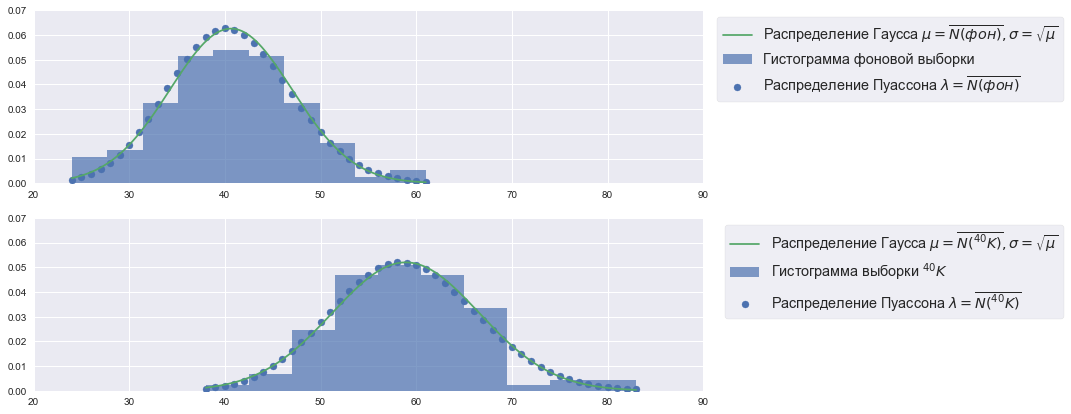

In [11]:
fig =  plt.figure(figsize=(12, 7))
ax  =  fig.add_subplot(211)
plt.hist(N_background, alpha=0.7, density=True, label='Гистограмма фоновой выборки')
plt.scatter(x_p_1, y_p_1, label='Распределение Пуассона $\lambda = \overline{N(фон)}$')
plt.plot(x_g_1, y_g_1, label='Распределение Гаусса $\mu = \overline{N(фон)}, \sigma = \sqrt{\mu} $')
plt.legend(loc='best', bbox_to_anchor=(1.55, 0., 0, 1), frameon='True', fontsize='x-large')
plt.axis([20, 90, 0, 0.07])

ax  =  fig.add_subplot(212)
plt.hist(N_K_40, alpha=0.7, density=True, label='Гистограмма выборки $^{40}K$')
plt.scatter(x_p_2, y_p_2, label='Распределение Пуассона $\lambda = \overline{N(^{40}K)}$')
plt.plot(x_g_2, y_g_2, label='Распределение Гаусса $\mu = \overline{N(^{40}K)}, \sigma = \sqrt{\mu}$')
plt.legend(loc='best', bbox_to_anchor=(1.55, 0., 0, 1), frameon='True', fontsize='x-large')
plt.axis([20, 90, 0, 0.07])

### Эмпирические функции

Построим эмпиреческие функции для каждой выборки

In [12]:
empirical_function_1 = lambda x: N_background[N_background<=x].size/100
empirical_function_2 = lambda x: N_K_40[N_K_40<=x].size/100

Вычислим эмпиречкую функцию для каждого значения выборки

In [13]:
y_emp_1 = np.array([empirical_function_1(i) for i in x_p_1])
y_emp_2 = np.array([empirical_function_2(i) for i in x_p_2])

Построим их графики

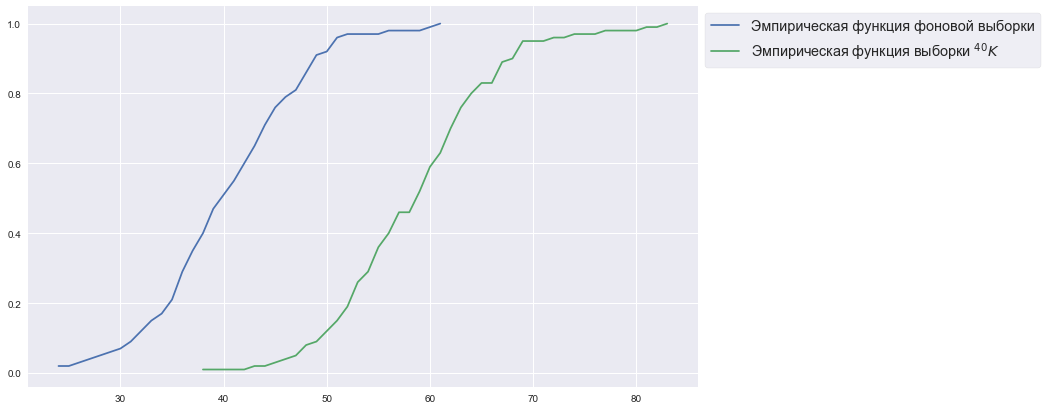

In [14]:
fig =  plt.figure(figsize=(12, 7))
plt.plot(x_p_1, y_emp_1, label='Эмпирическая функция фоновой выборки')
plt.plot(x_p_2, y_emp_2, label='Эмпирическая функция выборки $^{40}K$')
plt.legend(loc='best', bbox_to_anchor=(1, 0., 0, 1), frameon='True', fontsize='x-large')

Критерий Смирнова
---

Если статистика $\displaystyle {\sqrt {\frac {nm}{n+m}}}D$ превышает значение квантиль распределения Колмогорова $K_{\alpha}$ для заданного уровня значимости $\alpha$, то нулевая гипотеза $H_0$ об однородности выборки отвергается с уровнем доверия $1-\alpha$.

Здесь $n$, $m$ размеры выборок, а $D$ определяется следующим образом:
$$
    D = \underset{x}{sup} | F(x) - F^{'}(x) |
$$
здесь $F(x)$ и $F^{'}(x)$ - эмпирические функции распределений

Рассчитаем данную величину простым образом, используя наши выборки

In [15]:
x_for_d = np.arange(np.min(N_background), np.max(N_K_40), 1) 

In [16]:
D = np.max(np.array([np.abs(empirical_function_1(i)-empirical_function_2(i)) for i in x_for_d]))

D

0.8200000000000001

Тогда значение статистики

In [17]:
np.sqrt(len(N_background)*len(N_K_40)/(len(N_background)+len(N_K_40)))*D

5.798275605729691

Задавшись уровнем значимости $1-\alpha =  0.9999$ мы можем оценить значения квантиля распределения Колмогорова следующим образом:
$$
    K_{\alpha} = \sqrt{-\frac12 \log\frac{\alpha}{2}}
$$

In [18]:
round(np.sqrt(-1/2*np.log(0.0001/2)), 4)

2.2253

Так как значение статистики значительно превышает квантиль распределения Колмогорова мы отвергаем нулевую гипотезу об однородности распределений и заключаем, что источник является радиоактивным

### Оценка вероятности распада

Определим скоросчть счета событий от источника, воспользовавшись формулой:

$$
    I_{full} = I_{background} + I_{source}
$$

In [19]:
I = I_1 + I_2

I

3.3515151515151516

Оценим вероятность $\beta$ - распада частиц $^{40}K$. 

Будем считать, что детектор закрывает 10 $\%$ полного телесного угла, в который вылетают продукты распада. 

Вероятность можно оценить из следующего соотношения:

$$
    W = 0.1 \cdot\displaystyle\frac{\overline{N(^{40}K) } }{N_{a}\, \frac{m}{M} \,\nu\, t\, \frac{\ln 2}{T_{\frac12}}}
$$

здесь 

$N_{a}$ - число Авогадро 

$m$ - масса источника

$M$ - молярная масса

$\nu$ - процентное содержание $^{40}K$ в источнике ($\nu = 0.012$)

$t$ - время одного счета

$T_{\frac12}$ - период полураспада ($ T_{\frac12} = 1.248\cdot 10^9$ лет)

фактор 0.1 связан с телесным углом

In [20]:
N_a = 6.0221409*10**(23) # 1/моль
m = 500 # г
M = 94 # г/моль
nu = 0.012/100
T = 1.248*10**(9)*365*24*3600 # секунд

In [21]:
0.1*mu_2/(N_a*m/M*nu*np.log(2)*t/T)

2.9294107263451604e-05